In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime
from datetime import date

from warnings import filterwarnings
filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/credit-card-customers/BankChurners.csv


## 1. Reading Dataset

In [2]:
data = pd.read_csv('/kaggle/input/credit-card-customers/BankChurners.csv')
print(data.shape)
data.head()

(10127, 23)


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


**Remove the unnecessary column**

In [3]:
data = data.iloc[:,1:21]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [4]:
data.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [5]:
numerical = [var for var in data.columns if data[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))
print('The numerical variables are :', numerical)

There are 14 numerical variables
The numerical variables are : ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


In [6]:
categorical = [var for var in data.columns if data[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))
print('The categorical variables are :', categorical)

There are 6 categorical variables
The categorical variables are : ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']


In [7]:
for var in categorical: 
    print(data[var].value_counts())
    print(data[var].value_counts()/np.float(len(data)))
    print()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
Existing Customer    0.83934
Attrited Customer    0.16066
Name: Attrition_Flag, dtype: float64

F    5358
M    4769
Name: Gender, dtype: int64
F    0.529081
M    0.470919
Name: Gender, dtype: float64

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
Graduate         0.308877
High School      0.198776
Unknown          0.149995
Uneducated       0.146835
College          0.100030
Post-Graduate    0.050953
Doctorate        0.044534
Name: Education_Level, dtype: float64

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64
Married     0.462822
Single      0.389355
Unknown     0.073961
Divorced    0.073862
Name: Marital_Status, dtype: float64

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - 

**Delete the unknown values**

In [8]:
data.replace({'Unknown':np.nan},inplace=True)
data = data.dropna()
print(data.shape)

(7081, 20)


In [9]:
for var in categorical:
    print(var, ' contains ', len(data[var].unique()), ' labels')

Attrition_Flag  contains  2  labels
Gender  contains  2  labels
Education_Level  contains  6  labels
Marital_Status  contains  3  labels
Income_Category  contains  5  labels
Card_Category  contains  4  labels


In [10]:
df= data.copy()
df['Attrition_Flag'] = df.Attrition_Flag.replace({'Existing Customer':0,'Attrited Customer':1}).astype('int64')

## 2. Exploratory Data Analysis

#### Pie chart for target

In [11]:
data['Attrition_Flag'].value_counts()

Existing Customer    5968
Attrited Customer    1113
Name: Attrition_Flag, dtype: int64

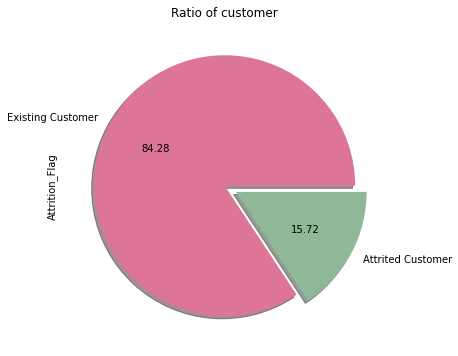

In [12]:
colors=('#DD7596','#8EB897')
explode=[0,0.1]
data['Attrition_Flag'].value_counts().plot(kind='pie',shadow=True,explode=explode,colors=colors,autopct='%.2f',figsize=(8,6))
plt.title('Ratio of customer')
plt.show()

#### Correlation between numerical features

<AxesSubplot:title={'center':'Correlation between variables'}>

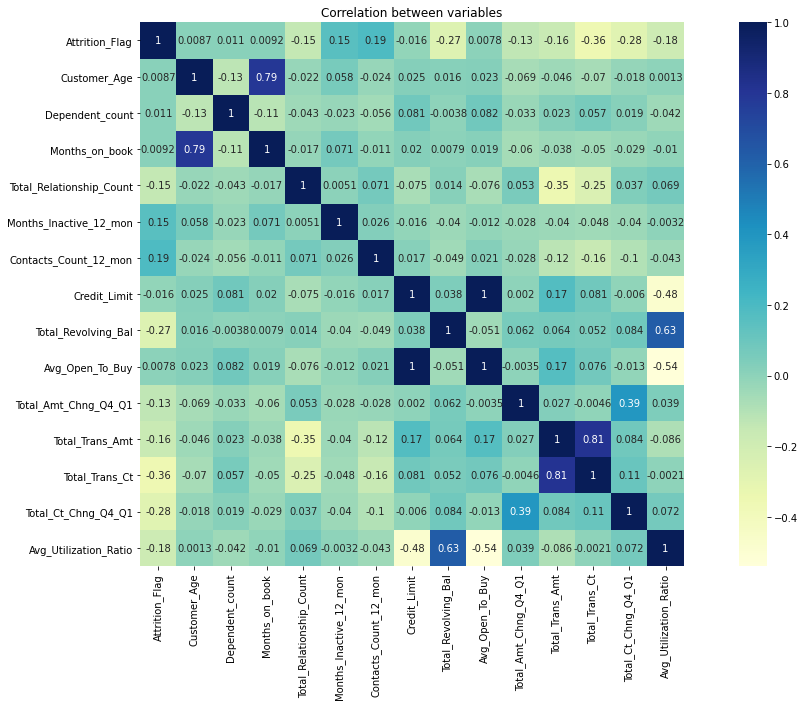

In [13]:
plt.subplots(figsize=(20,10))
plt.title('Correlation between variables')
sns.heatmap(df.corr(),annot=True,square=True,cmap='YlGnBu')

In [14]:
numcorr = df.corr()
Num = numcorr['Attrition_Flag'].sort_values(ascending=False).to_frame()
cm = sns.color_palette('YlGnBu', as_cmap=True)
s = Num.style.background_gradient(cmap=cm)
s

,Attrition_Flag
Attrition_Flag,1.000000
Contacts_Count_12_mon,0.193923
Months_Inactive_12_mon,0.152732
Dependent_count,0.011423
Months_on_book,0.009249
Customer_Age,0.008735
Avg_Open_To_Buy,0.007802
Credit_Limit,-0.015815
Total_Amt_Chng_Q4_Q1,-0.132702
Total_Relationship_Count,-0.145713


#### Univariate Distribution and Bivariate Distribution

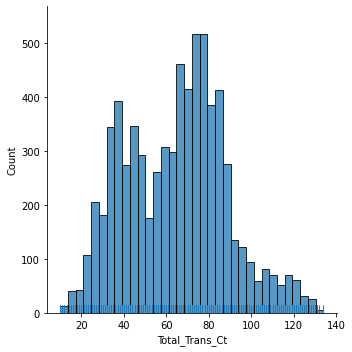

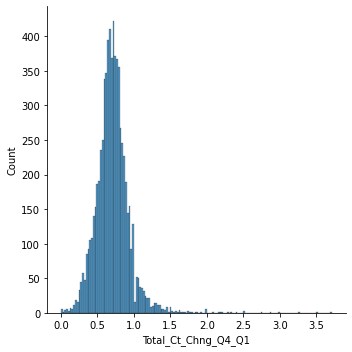

In [15]:
sns.displot(data['Total_Trans_Ct'], rug=True)
plt.show()

sns.displot(data['Total_Ct_Chng_Q4_Q1'])
plt.show()

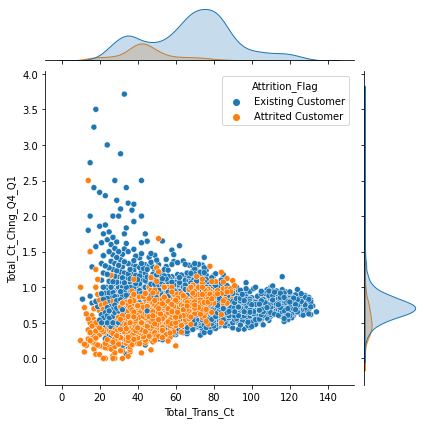

In [16]:
sns.jointplot(x=data['Total_Trans_Ct'],y=data['Total_Ct_Chng_Q4_Q1'],hue=data['Attrition_Flag'])

#### Visualization for Categorical Variables

* Attrition_Flag  contains  2  labels
* Gender  contains  2  labels
* Education_Level  contains  6  labels
* Marital_Status  contains  3  labels
* Income_Category  contains  5  labels
* Card_Category  contains  4  labels

<AxesSubplot:title={'center':'count of Gender colored by customers'}, xlabel='Gender', ylabel='count'>

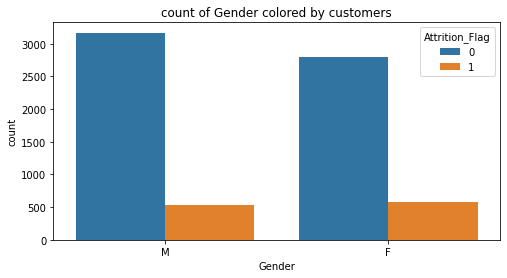

In [17]:
plt.figure(figsize=(8,4))
plt.title('count of Gender colored by customers')
sns.countplot(data=df,x='Gender',hue='Attrition_Flag')

<AxesSubplot:title={'center':'count of Education Level colored by customers'}, xlabel='Education_Level', ylabel='count'>

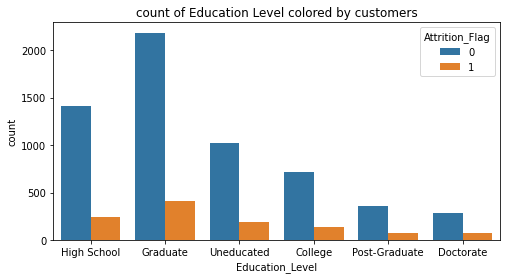

In [18]:
plt.figure(figsize=(8,4))
plt.title('count of Education Level colored by customers')
sns.countplot(data=df,x='Education_Level',hue='Attrition_Flag')

<AxesSubplot:title={'center':'count of Marital Status colored by customers'}, xlabel='Marital_Status', ylabel='count'>

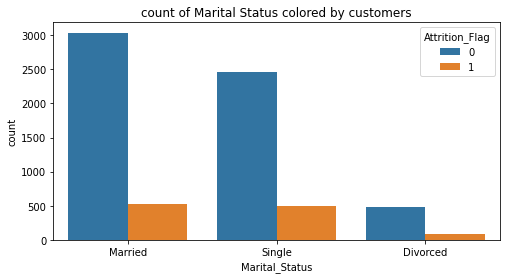

In [19]:
plt.figure(figsize=(8,4))
plt.title('count of Marital Status colored by customers')
sns.countplot(data=df,x='Marital_Status',hue='Attrition_Flag')

<AxesSubplot:title={'center':'count of Income Category colored by customers'}, xlabel='Income_Category', ylabel='count'>

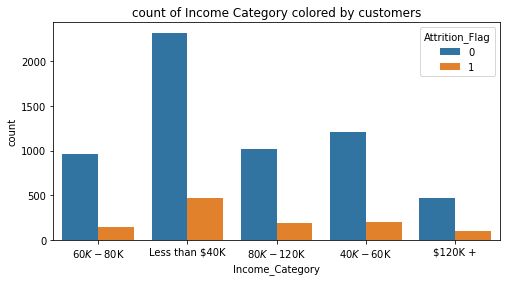

In [20]:
plt.figure(figsize=(8,4))
plt.title('count of Income Category colored by customers')
sns.countplot(data=df,x='Income_Category',hue='Attrition_Flag')

<AxesSubplot:title={'center':'count of Card Category colored by customers'}, xlabel='Card_Category', ylabel='count'>

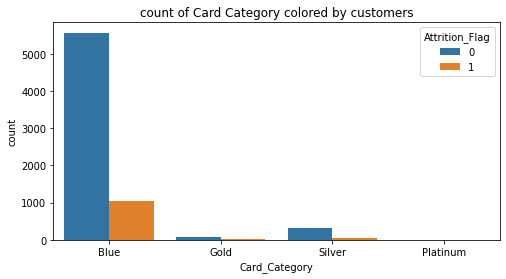

In [21]:
plt.figure(figsize=(8,4))
plt.title('count of Card Category colored by customers')
sns.countplot(data=df,x='Card_Category',hue='Attrition_Flag')

## 3. Data Preprocessing

#### Label Encoding

In [22]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
 
data['Attrition_Flag'] = label_encoder.fit_transform(data['Attrition_Flag'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Income_Category'] = label_encoder.fit_transform(data['Income_Category'])
data['Card_Category'] = label_encoder.fit_transform(data['Card_Category'])
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,1,3,High School,Married,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,0,5,Graduate,Single,4,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,1,3,Graduate,Married,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
4,1,40,1,3,Uneducated,Married,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,1,44,1,2,Graduate,Married,1,0,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311


#### Dummy Variable Encoding

In [23]:
print(data['Education_Level'].unique())
print(data['Marital_Status'].unique())

['High School' 'Graduate' 'Uneducated' 'College' 'Post-Graduate'
 'Doctorate']
['Married' 'Single' 'Divorced']


In [24]:
data = pd.get_dummies(data,columns=['Education_Level','Marital_Status'],prefix=['Education','Status'])
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Avg_Utilization_Ratio,Education_College,Education_Doctorate,Education_Graduate,Education_High School,Education_Post-Graduate,Education_Uneducated,Status_Divorced,Status_Married,Status_Single
0,1,45,1,3,2,0,39,5,1,3,...,0.061,0,0,0,1,0,0,0,1,0
1,1,49,0,5,4,0,44,6,1,2,...,0.105,0,0,1,0,0,0,0,0,1
2,1,51,1,3,3,0,36,4,1,0,...,0.000,0,0,1,0,0,0,0,1,0
4,1,40,1,3,2,0,21,5,1,0,...,0.000,0,0,0,0,0,1,0,1,0
5,1,44,1,2,1,0,36,3,1,2,...,0.311,0,0,1,0,0,0,0,1,0


## 4. Feature Engineering

#### (A) Feature Scaling

In [25]:
features = data.drop('Attrition_Flag',axis=1)
target = data['Attrition_Flag']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
scaled_values = scaler.fit_transform(features) 
features.loc[:,:] = scaled_values
features.head()

,Customer_Age,Gender,Dependent_count,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Avg_Utilization_Ratio,Education_College,Education_Doctorate,Education_Graduate,Education_High School,Education_Post-Graduate,Education_Uneducated,Status_Divorced,Status_Married,Status_Single
0,-0.167610,0.954298,0.512710,-0.431950,-0.259518,0.377234,0.764487,-1.349309,0.493777,0.460058,...,-0.794057,-0.367861,-0.23076,-0.759645,1.812106,-0.254582,-0.452622,-0.295596,0.993384,-0.844561
1,0.329862,-1.047890,2.061228,1.014215,-0.259518,1.002074,1.412015,-1.349309,-0.411332,-0.025947,...,-0.636187,-0.367861,-0.23076,1.316405,-0.551844,-0.254582,-0.452622,-0.295596,-1.006660,1.184047
2,0.578598,0.954298,0.512710,0.291133,-0.259518,0.002330,0.116959,-1.349309,-2.221550,-0.556114,...,-1.012921,-0.367861,-0.23076,1.316405,-0.551844,-0.254582,-0.452622,-0.295596,0.993384,-0.844561
4,-0.789449,0.954298,0.512710,-0.431950,-0.259518,-1.872192,0.764487,-1.349309,-2.221550,-0.413874,...,-1.012921,-0.367861,-0.23076,-0.759645,-0.551844,-0.254582,2.209350,-0.295596,0.993384,-0.844561
5,-0.291978,0.954298,-0.261549,-1.155033,-0.259518,0.002330,-0.530569,-1.349309,-0.411332,-0.491240,...,0.102927,-0.367861,-0.23076,1.316405,-0.551844,-0.254582,-0.452622,-0.295596,0.993384,-0.844561


#### (B) Balance the target

In [26]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
X,y = sm.fit_resample(features,target)

In [27]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9548, 26)
(2388, 26)
(9548,)
(2388,)


## 5. Building Model

In [28]:
from sklearn.metrics import accuracy_score,recall_score,precision_score
from sklearn.metrics import f1_score,confusion_matrix,roc_auc_score

def evaluation(y_test,y_pred):
  acc = accuracy_score(y_test,y_pred)
  rcl = recall_score(y_test,y_pred)
  f1 = f1_score(y_test,y_pred)
  auc_score = roc_auc_score(y_test,y_pred)
  prec_score = precision_score(y_test,y_pred)
 

  metric_dict={'accuracy': round(acc,3),
               'recall': round(rcl,3),
               'F1 score': round(f1,3),
               'auc score': round(auc_score,3),
               'precision': round(prec_score,3) 
              }

  return print(metric_dict)

In [29]:
Results = pd.DataFrame({'Model': [],'Accuracy Score': [], 'Recall':[], 'F1score':[]})

#### Decision Tree Classifier

In [30]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
y_pred1 = tree.predict(X_test)
res = pd.DataFrame({"Model":['DecisionTreeClassifier'],
                    "Accuracy Score": [accuracy_score(y_pred1,y_test)],
                    "Recall": [recall_score(y_test,y_pred1)],
                    "F1score": [f1_score(y_test,y_pred1)]})
Results = Results.append(res)

In [31]:
pd.crosstab(y_test,y_pred1,rownames=['Real data'],colnames=['Predicted'])

Predicted,0,1
Real data,,
0,1151,64
1,64,1109


#### Random Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred2 = rfc.predict(X_test)
res = pd.DataFrame({"Model":['RandomForestClassifier'],
                    "Accuracy Score": [accuracy_score(y_pred2,y_test)],
                    "Recall": [recall_score(y_test,y_pred2)],
                    "F1score": [f1_score(y_test,y_pred2)]})
Results = Results.append(res)

In [33]:
pd.crosstab(y_test,y_pred2,rownames=['Real data'],colnames=['Predicted'])

Predicted,0,1
Real data,,
0,1193,22
1,28,1145


#### KNN Classifier

In [34]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred3 = knn.predict(X_test)
res = pd.DataFrame({"Model":['KNeighborsClassifier'],
                    "Accuracy Score": [accuracy_score(y_pred3,y_test)],
                    "Recall": [recall_score(y_test,y_pred3)],
                    "F1score": [f1_score(y_test,y_pred3)]})
Results = Results.append(res)

In [35]:
pd.crosstab(y_test,y_pred3,rownames=['Real data'],colnames=['Predicted'])

Predicted,0,1
Real data,,
0,1192,23
1,235,938


#### SVC

In [36]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train,y_train)
y_pred4 = svc.predict(X_test)
res = pd.DataFrame({"Model":['SVC'],
                    "Accuracy Score": [accuracy_score(y_pred4,y_test)],
                    "Recall": [recall_score(y_test,y_pred4)],
                    "F1score": [f1_score(y_test,y_pred4)]})
Results = Results.append(res)

In [37]:
pd.crosstab(y_test,y_pred4,rownames=['Real data'],colnames=['Predicted'])

Predicted,0,1
Real data,,
0,1151,64
1,91,1082


#### Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred5 = lr.predict(X_test)
res = pd.DataFrame({"Model":['LogisticRegression'],
                    "Accuracy Score": [accuracy_score(y_pred5,y_test)],
                    "Recall": [recall_score(y_test,y_pred5)],
                    "F1score": [f1_score(y_test,y_pred5)]})
Results = Results.append(res)

In [39]:
pd.crosstab(y_test,y_pred5,rownames=['Real data'],colnames=['Predicted'])

Predicted,0,1
Real data,,
0,1030,185
1,167,1006


#### XGB Classifier

In [40]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred6 = xgb.predict(X_test)
res = pd.DataFrame({"Model":['XGBClassifier'],
                    "Accuracy Score": [accuracy_score(y_pred6,y_test)],
                    "Recall": [recall_score(y_test,y_pred6)],
                    "F1score": [f1_score(y_test,y_pred6)]})
Results = Results.append(res)

[22:07:12] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [41]:
pd.crosstab(y_test,y_pred6,rownames=['Real data'],colnames=['Predicted'])

Predicted,0,1
Real data,,
0,1189,26
1,18,1155


In [42]:
Results.sort_values(by='Accuracy Score',ascending=True)

,Model,Accuracy Score,Recall,F1score
0,LogisticRegression,0.852596,0.857630,0.851100
0,KNeighborsClassifier,0.891960,0.799659,0.879100
0,SVC,0.935092,0.922421,0.933161
0,DecisionTreeClassifier,0.946399,0.945439,0.945439
0,RandomForestClassifier,0.979062,0.976130,0.978632
0,XGBClassifier,0.981575,0.984655,0.981308


How we see - **XGBClassifier** gives the best results

## 6. Model Evalution

In [43]:
from sklearn.metrics import classification_report,plot_confusion_matrix,plot_roc_curve

### XGB Classifier

In [44]:
model = XGBClassifier(objective='binary:logistic',eval_metric=['logloss'])
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [45]:
print(" Best evaluation parameters achieved with XGBClassifier:") 
evaluation(y_test,y_pred)

 Best evaluation parameters achieved with XGBClassifier:
{'accuracy': 0.982, 'recall': 0.985, 'F1 score': 0.981, 'auc score': 0.982, 'precision': 0.978}


In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1215
           1       0.98      0.98      0.98      1173

    accuracy                           0.98      2388
   macro avg       0.98      0.98      0.98      2388
weighted avg       0.98      0.98      0.98      2388



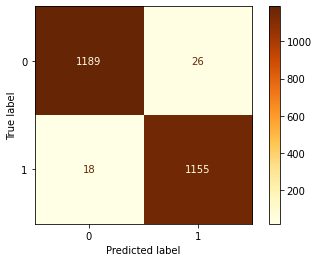

In [47]:
plot_confusion_matrix(model,X_test,y_test,cmap='YlOrBr')

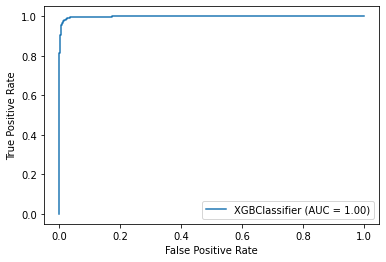

In [48]:
plot_roc_curve(model,X_test,y_test)

#### Feature Importance

In [49]:
feat_importance = model.feature_importances_
feat_importance = pd.DataFrame(feat_importance,columns=['Score'],index=features.columns)

In [50]:
feat_importance.sort_values(by='Score',ascending=False).style.background_gradient(cmap='OrRd')

,Score
Total_Trans_Ct,0.306516
Total_Revolving_Bal,0.098477
Total_Relationship_Count,0.088906
Months_Inactive_12_mon,0.081921
Total_Trans_Amt,0.066698
Contacts_Count_12_mon,0.052332
Gender,0.050487
Total_Ct_Chng_Q4_Q1,0.049837
Customer_Age,0.024509
Total_Amt_Chng_Q4_Q1,0.023319


<AxesSubplot:title={'center':'Feature Importances'}, xlabel='Score'>

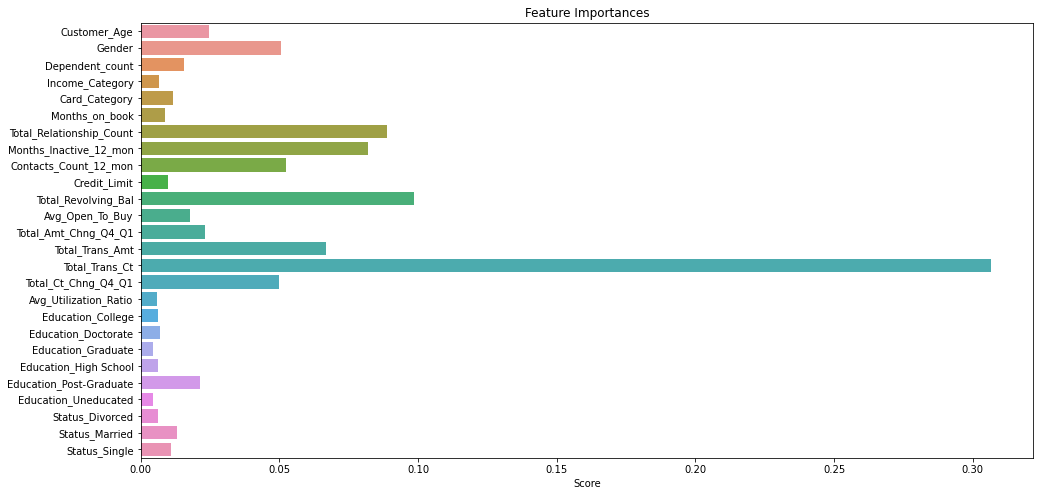

In [51]:
plt.figure(figsize=(16,8))
plt.title('Feature Importances')
sns.barplot(x=feat_importance.Score,y=feat_importance.index)

**Conclusion:**

I got maximum accuracy score of 0.982 on **XGBClassifier**.